In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
# style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 25,15
plt.rcParams['figure.dpi'] = 100

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import folium 

In [28]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [29]:
df = pd.read_excel("Covid casesinIndia.xlsx")

In [30]:
df.drop(['S. No.'], axis=1, inplace=True)

In [31]:
df['Total Cases']=df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [32]:
total_cases_overall = df['Total Cases'].sum() 
print("Total Number of Cases till now in India are :", total_cases_overall)

Total Number of Cases till now in India are : 729


In [33]:
df['Total Active Cases'] = df['Total Cases'] - df['Cured'] - df['Death']

In [34]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [35]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Total Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [36]:
total_active_cases = df.groupby('Name of State / UT')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()

In [37]:
total_active_cases.style.background_gradient(cmap='Reds')

,Total Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


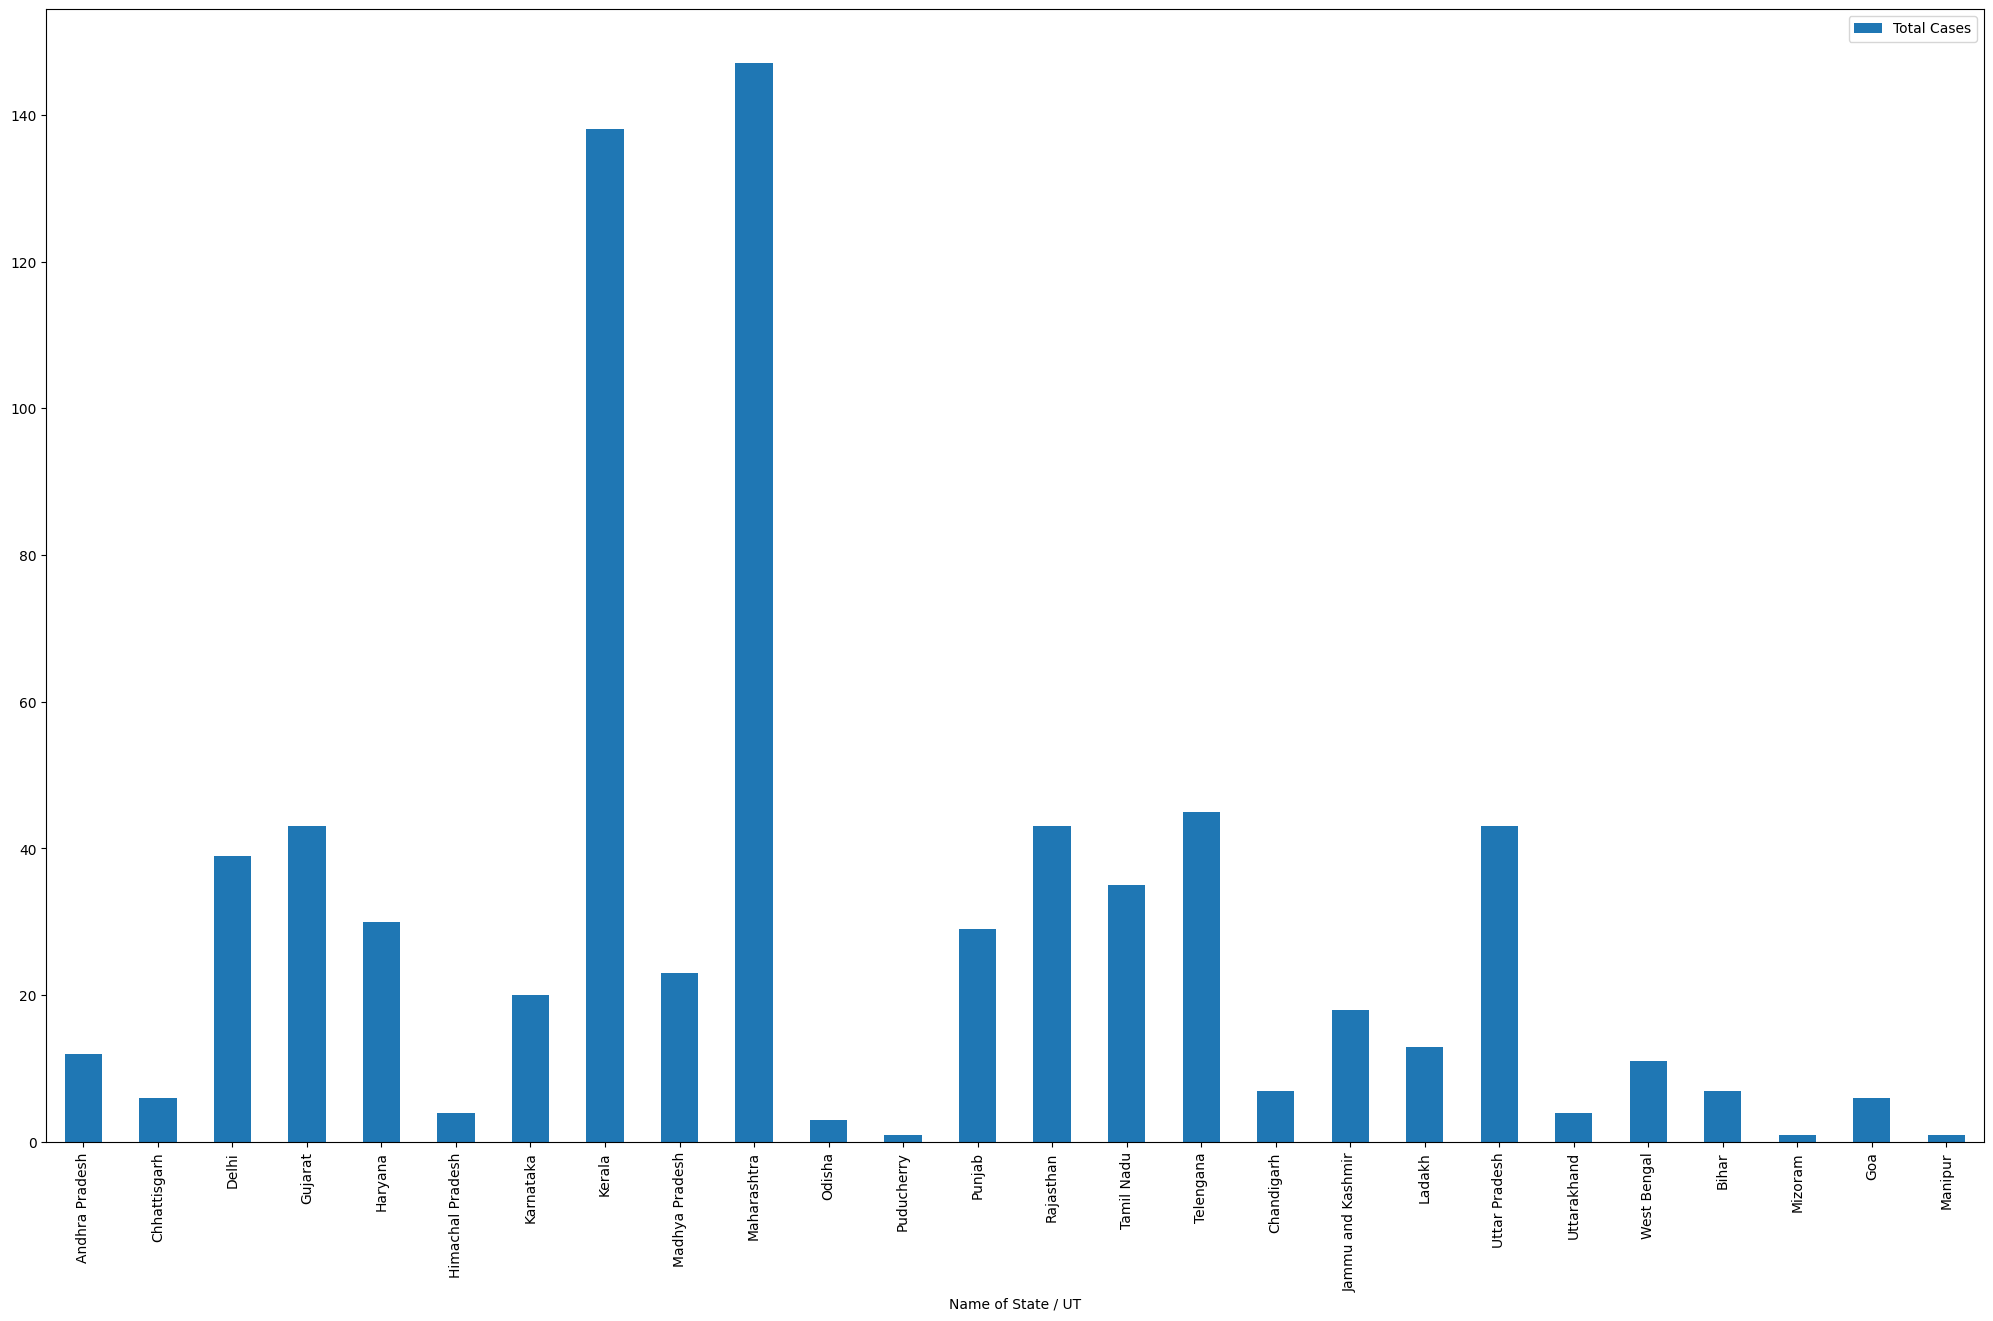

In [41]:
df.plot(kind='bar', x = 'Name of State / UT', y='Total Cases')
plt.show()
df.iplot(kind='bar', x = 'Name of State / UT', y='Total Cases')
plt.show()

<BarContainer object of 26 artists>

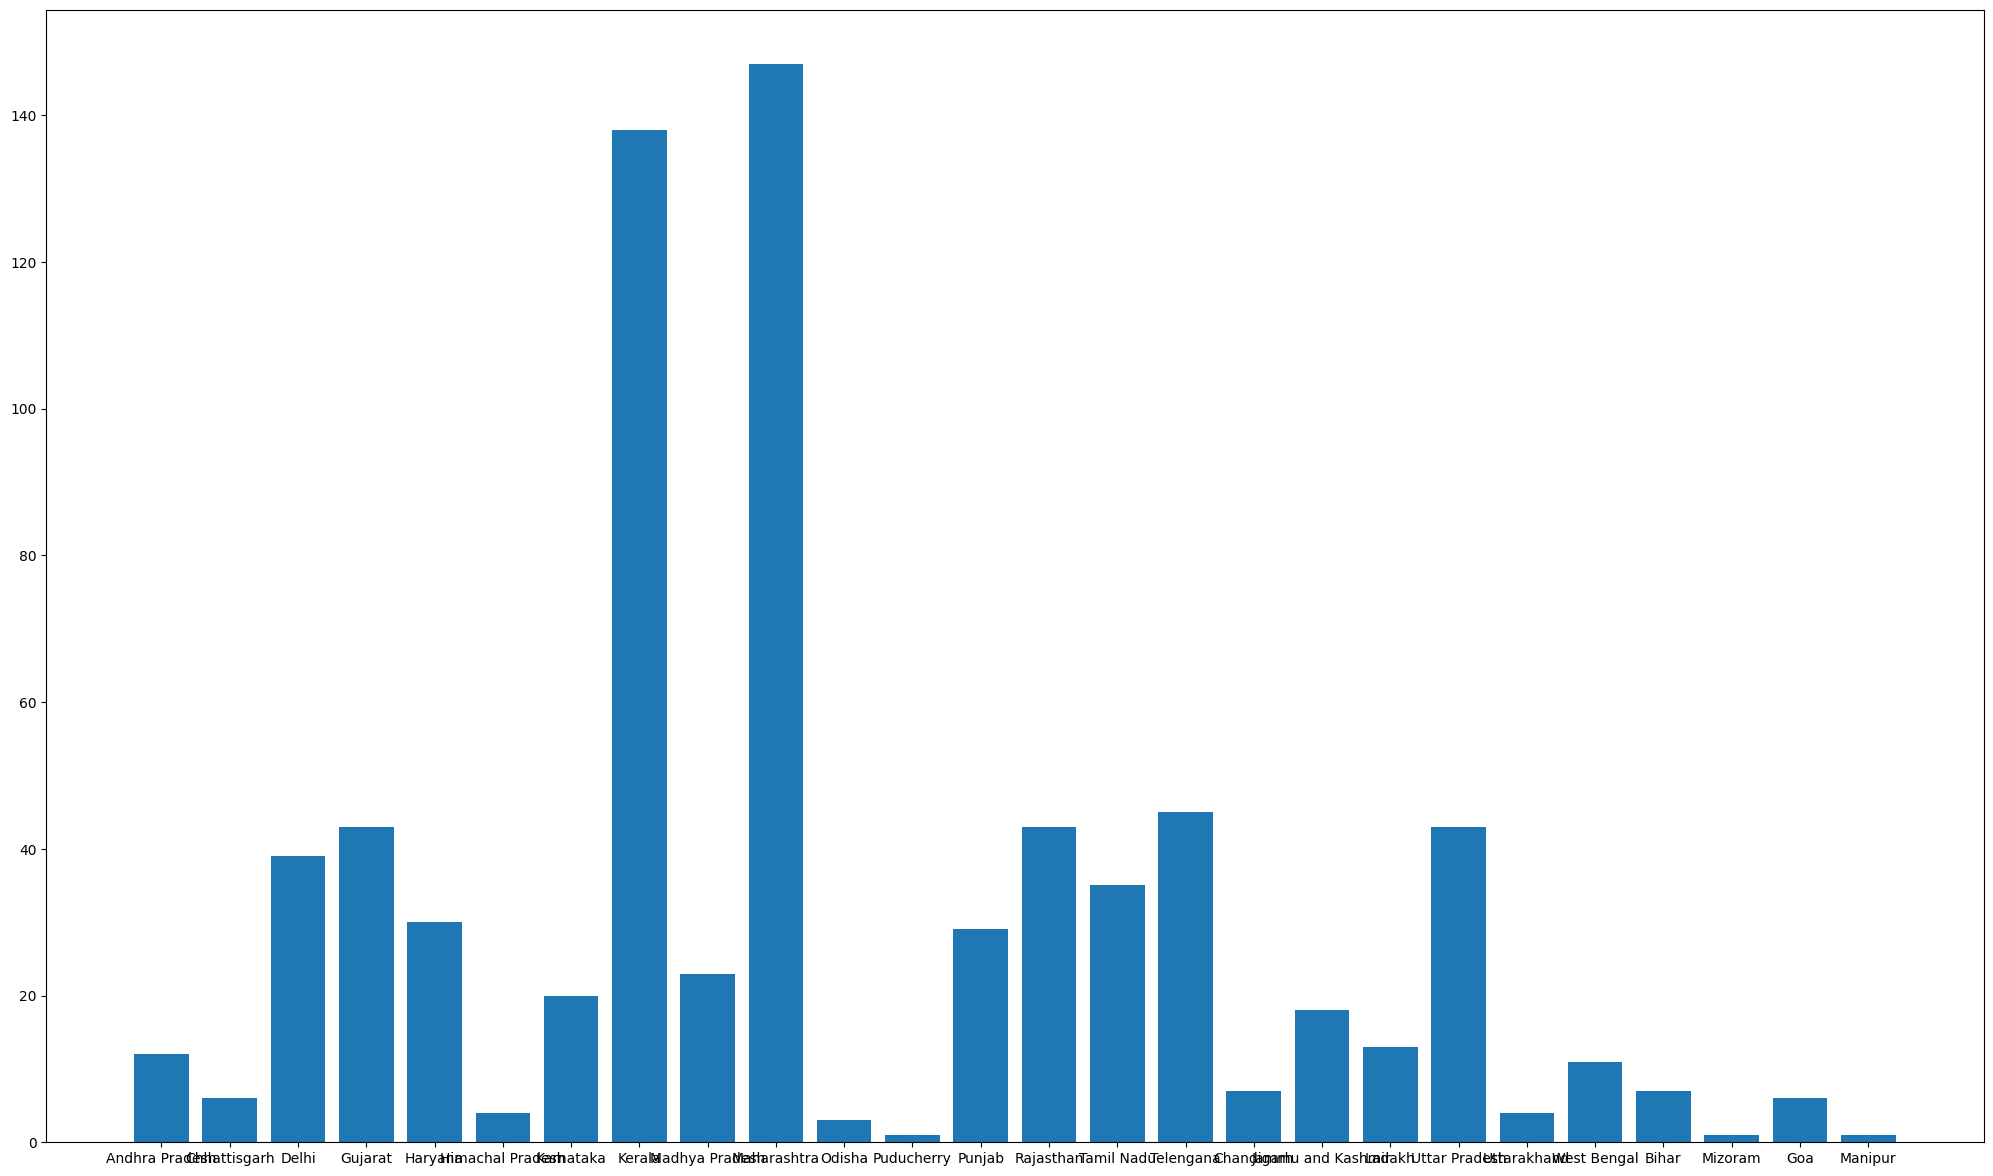

In [42]:
plt.bar(df['Name of State / UT'], df['Total Cases'])

In [43]:
px.bar(df, x = 'Name of State / UT', y='Total Cases')

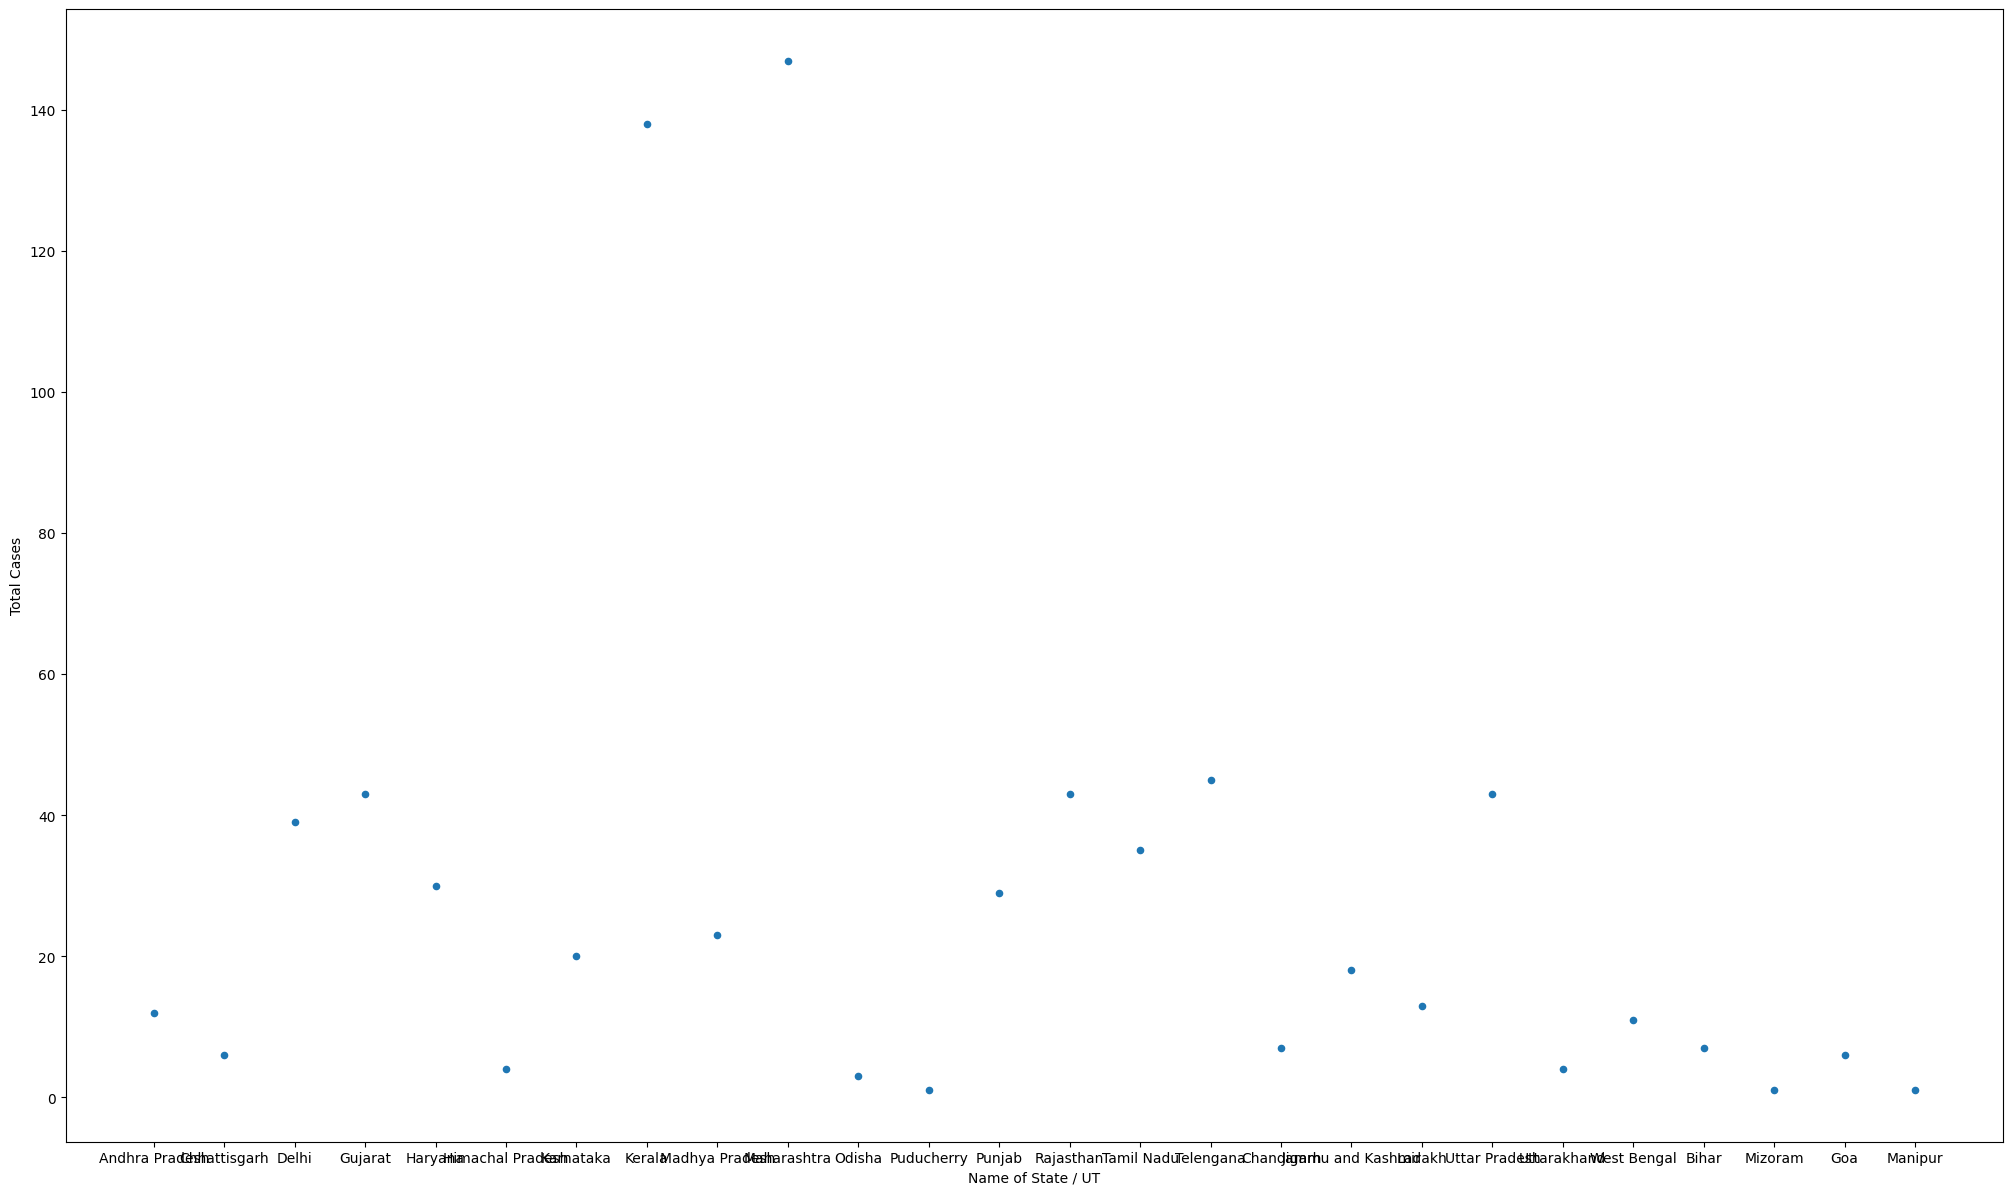

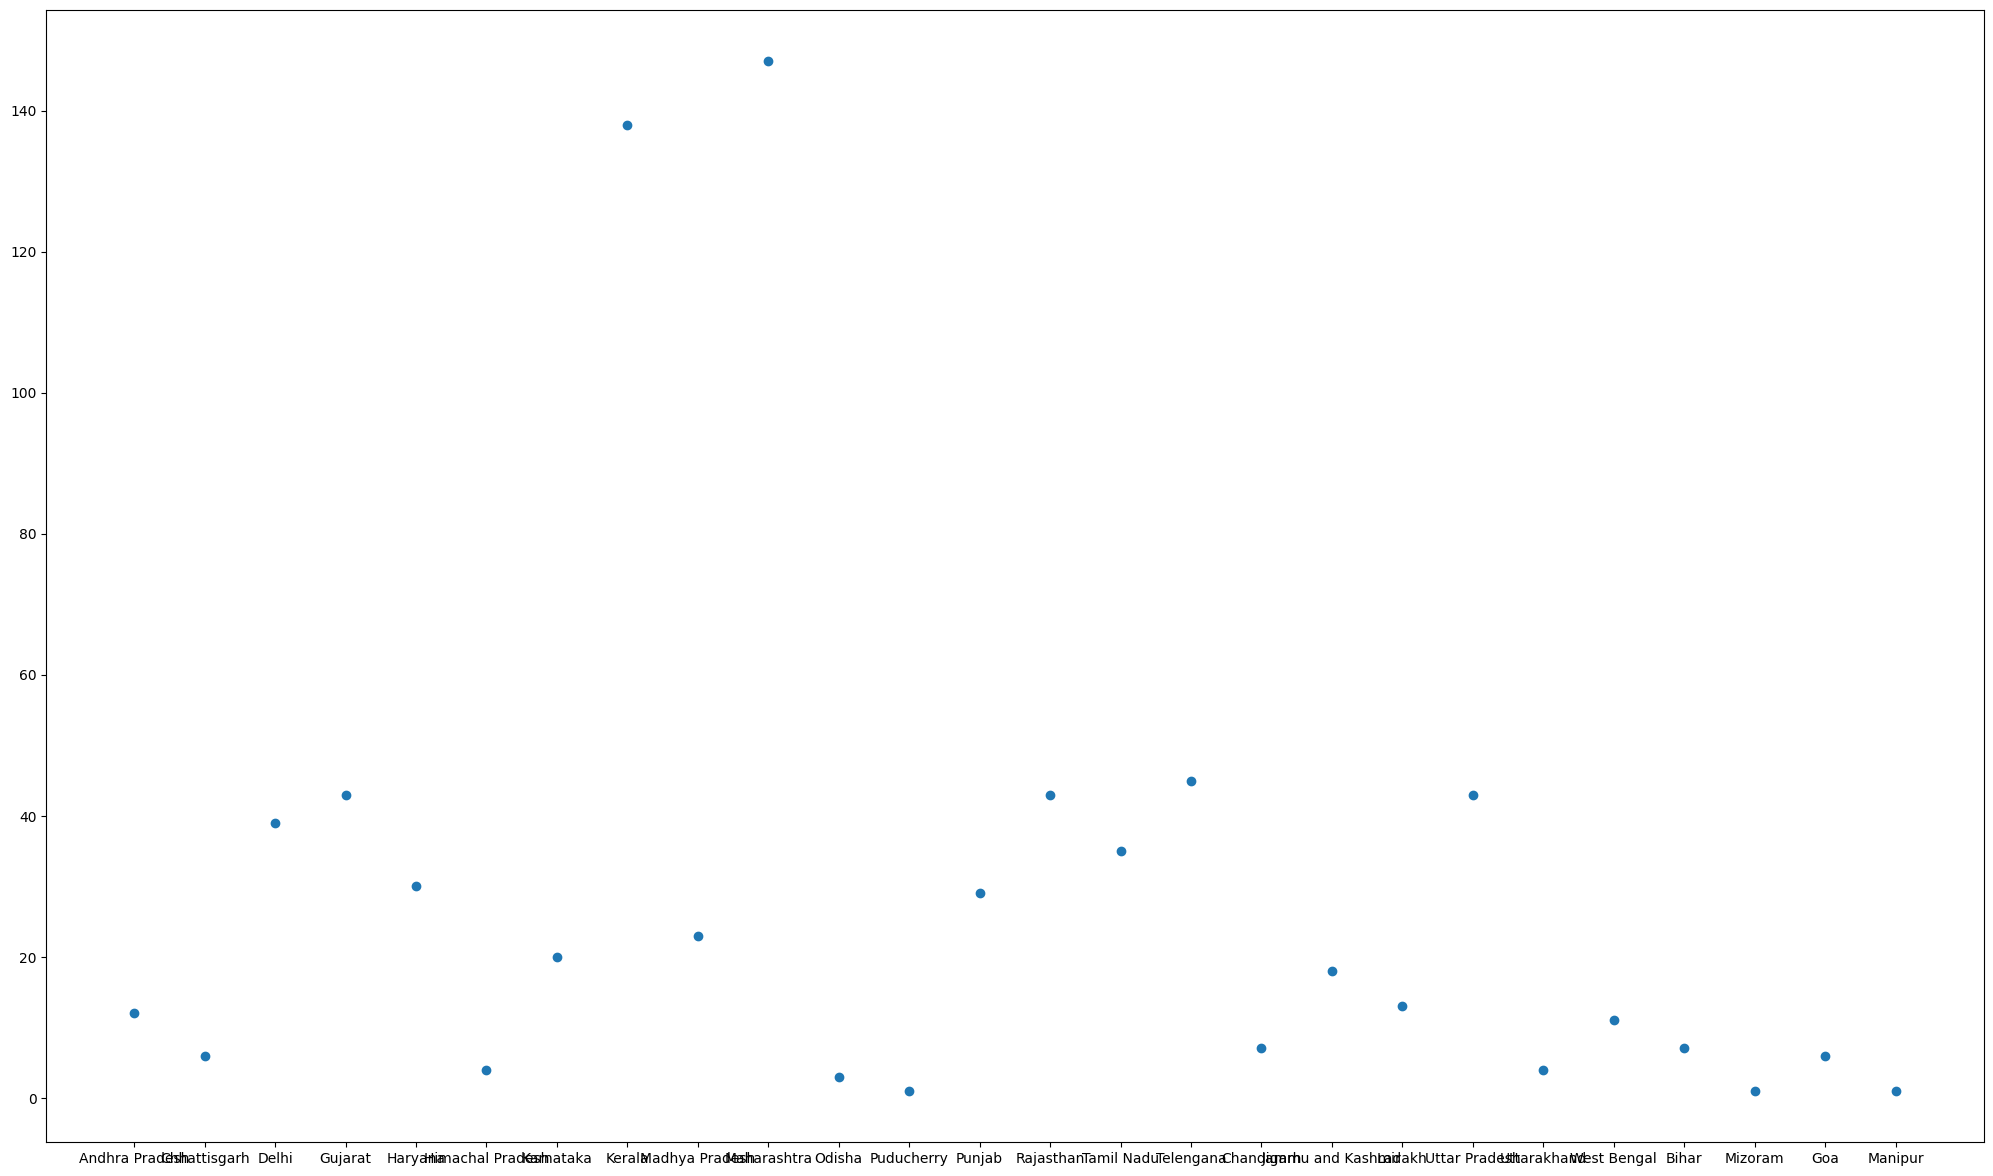

In [44]:
df.plot(kind='scatter', x = 'Name of State / UT', y='Total Cases')
plt.show()
plt.scatter(df['Name of State / UT'], df['Total Cases'])

In [45]:
df.iplot(kind='scatter', x = 'Name of State / UT', y='Total Cases', mode='markers+lines', xTitle="States", yTitle="Total Cases", colors='red', size=12)

In [46]:
px.scatter(df, x = 'Name of State / UT', y='Total Cases', color='Total Cases')

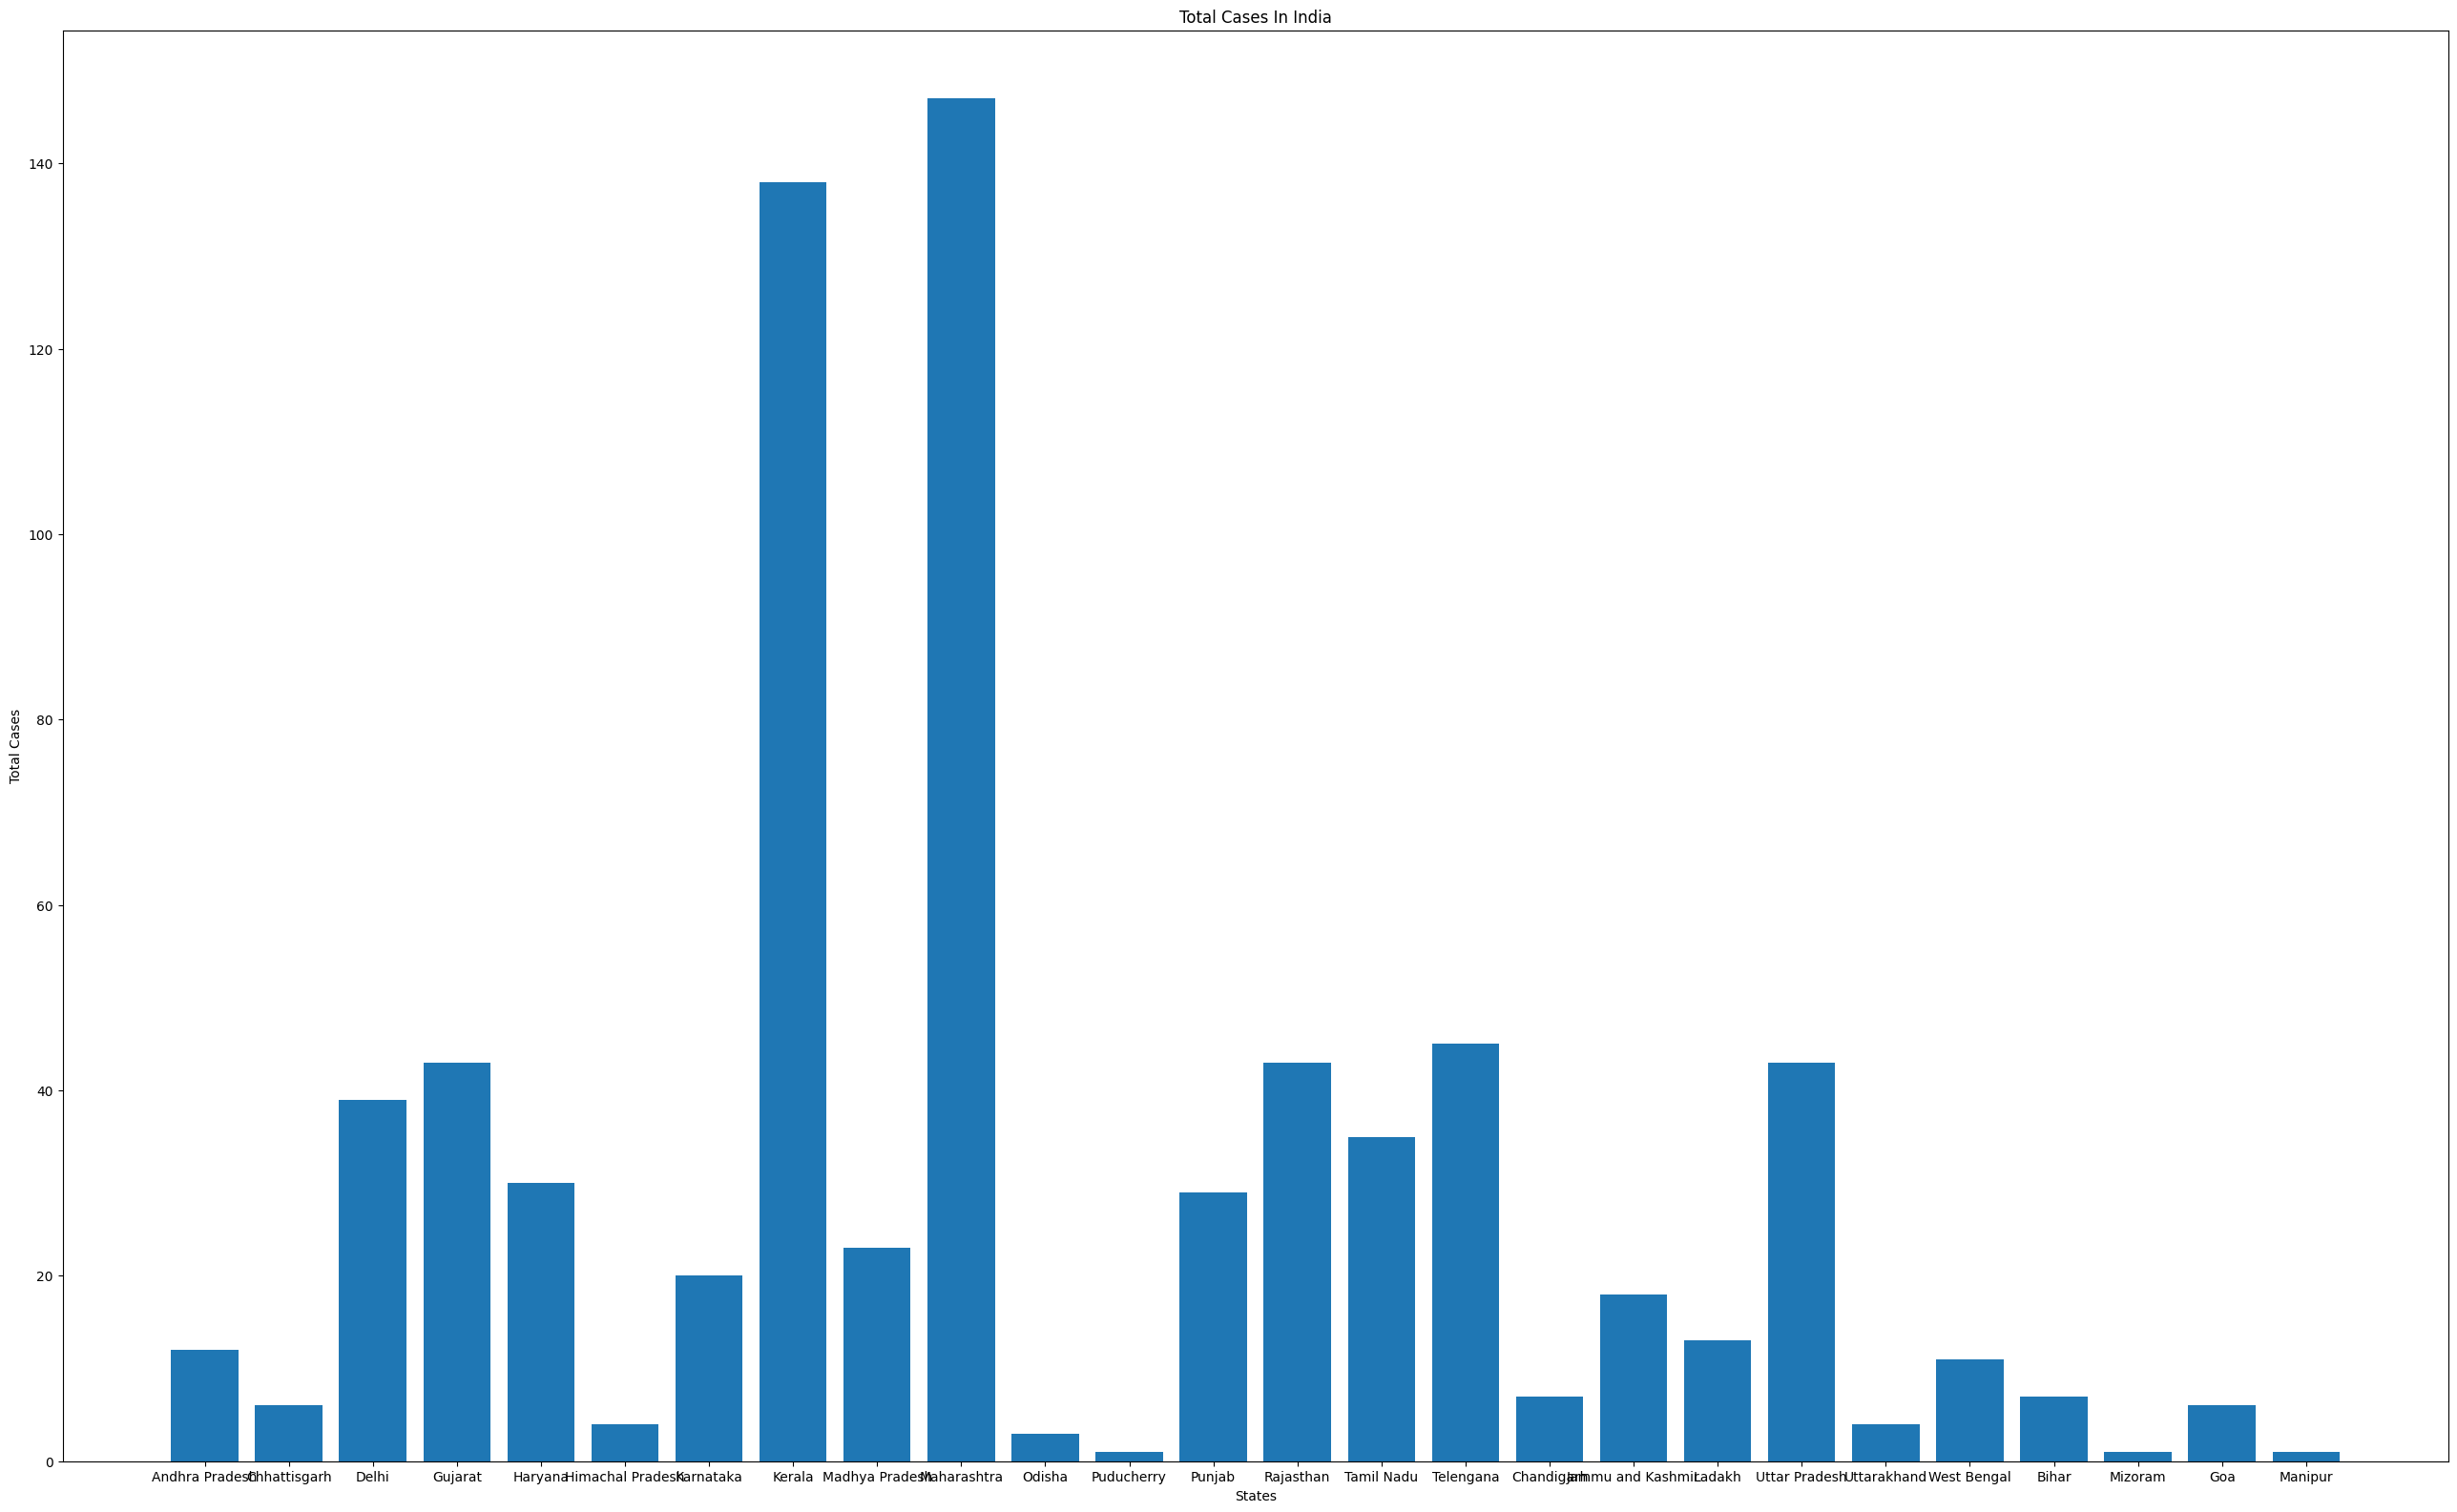

In [47]:
fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'], df['Total Cases'])
axes.set_title("Total Cases In India")
axes.set_xlabel("States")
axes.set_ylabel("Total Cases")
plt.show()